### Simplified Code for Image Recognition b/w Cat & Flower Images

Key Updates:

Classes: Updated from 2 classes to 4 (num_classes=4 in the SwinTransformer definition). The new classes are:

class_1: Cat images.

class_2: Flower images.

class_3: Images containing both a cat and a flower.

class_4: Images containing neither a cat nor a flower.

Folders: Updated training and test folder paths (train_data and test_data) to accommodate these 4 classes.

In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision import datasets
import matplotlib.pyplot as plt

from PIL import Image  # Original import

# Import for precision, recall, and F1 score
from sklearn.metrics import precision_score, recall_score, f1_score  # Original

# Pretrained SwinTransformer import
import timm  # Original

import matplotlib.pyplot as plt  # New import
import matplotlib.image as mpimg # New import

In [2]:
# Define the SwinTransformer model (using pretrained model)
class SwinTransformer(nn.Module):  # Original class definition
    def __init__(self, num_classes=4):  # Updated: Changed num_classes from 2 to 4
        super(SwinTransformer, self).__init__()
        # Use pre-trained SwinTransformer from timm
        self.model = timm.create_model('swin_tiny_patch4_window7_224', pretrained=True, num_classes=num_classes)  # Original

    def forward(self, x):
        return self.model(x)  # Original

In [3]:
# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Original


c:\Users\sharm\anaconda3\lib\site-packages\torch\cuda\__init__.py:128: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 8000). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\c10\cuda\CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0


In [4]:
# Data transforms with augmentation
transform = transforms.Compose([  # Original transform
    transforms.Resize((224, 224)),  # Original
    transforms.RandomHorizontalFlip(),  # Original
    transforms.RandomRotation(10),  # Original
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),  # Original
    transforms.ToTensor(),  # Original
])


In [5]:
# Load data
train_data = datasets.ImageFolder('C:/Users/sharm/Downloads/Cat_train', transform=transform)  # Original, folder now includes classes 1-4
test_data = datasets.ImageFolder('C:/Users/sharm/Downloads/Cat_test', transform=transform)  # Original, folder now includes classes 1-4

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)  # Original
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)  # Original

In [6]:
# Initialize model, loss, and optimizer
model = SwinTransformer(num_classes=4).to(device)  # Updated: num_classes=4 for the four image categories
criterion = nn.CrossEntropyLoss()  # Original
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=0.3)  # Original


In [7]:
# Training loop
def train(epochs):  # Original
    for epoch in range(epochs):  # Original
        model.train()  # Original
        for images, labels in train_loader:  # Original
            images, labels = images.to(device), labels.to(device)  # Original

            optimizer.zero_grad()  # Original
            outputs = model(images)  # Original
            loss = criterion(outputs, labels)  # Original
            loss.backward()  # Original
            optimizer.step()  # Original

        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')  # Original


In [8]:
# Test function
def test():  # Original
    model.eval()  # Original
    correct = 0  # Original
    total = 0  # Original
    with torch.no_grad():  # Original
        for images, labels in test_loader:  # Original
            images, labels = images.to(device), labels.to(device)  # Original
            outputs = model(images)  # Original
            _, predicted = torch.max(outputs.data, 1)  # Original
            total += labels.size(0)  # Original
            correct += (predicted == labels).sum().item()  # Original

    print(f'Accuracy on test images: {100 * correct / total}%')  # Original


In [9]:
# Train the model
train(epochs=10)  # Original

Epoch [1/10], Loss: 1.2283
Epoch [2/10], Loss: 1.0806
Epoch [3/10], Loss: 0.5084
Epoch [4/10], Loss: 0.3117
Epoch [5/10], Loss: 0.3217
Epoch [6/10], Loss: 0.3410
Epoch [7/10], Loss: 0.3199
Epoch [8/10], Loss: 0.4708
Epoch [9/10], Loss: 0.5807
Epoch [10/10], Loss: 0.4220


In [10]:
# Test the model
test()  # Original

Accuracy on test images: 46.15384615384615%


In [11]:
# Function to predict on a single image
def predict_image(image_path):  # Original
    image = Image.open(image_path)  # Original
    image = transform(image).unsqueeze(0).to(device)  # Original
    
    model.eval()  # Original
    with torch.no_grad():  # Original
        output = model(image)  # Original
        _, predicted = torch.max(output, 1)  # Original
    
    return train_data.classes[predicted.item()]  # Original


In [12]:
import os
import random

# Define the base test folder path
test_folder = "C:/Users/sharm/Downloads/Cat_test"

# List the available class folders
class_folders = ["class_1", "class_2", "class_3", "class_4"]

# Randomly select a folder
selected_folder = random.choice(class_folders)

# Construct the full path to the selected folder
selected_folder_path = os.path.join(test_folder, selected_folder)

# Get the list of image files in the selected folder
image_files = [f for f in os.listdir(selected_folder_path) if os.path.isfile(os.path.join(selected_folder_path, f))]

# Randomly select an image from the selected folder
selected_image = random.choice(image_files)

# Construct the full path to the selected image
custom_image_path = os.path.join(selected_folder_path, selected_image)

# Print the path of the selected image
print(f"Selected image path: {custom_image_path}")


Selected image path: C:/Users/sharm/Downloads/Cat_test\class_1\cat2.jpg


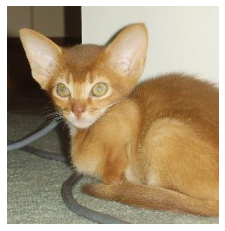

In [13]:
# Example usage
#custom_image_path = "C:/Users/sharm/Downloads/Cat_test/class_4/n10.jpg"  
# Updated: Example for class_3 image (cat and flower); for neither use n9 or n10

# Load and display the image
testing_img = mpimg.imread(custom_image_path)
plt.imshow(testing_img)
plt.axis('off')  # Hide the axis
plt.show()



In [14]:
prediction = predict_image(custom_image_path)  # Original
print(f"Prediction: {prediction}")  # Original

Prediction: class_1


In [15]:
# Collect predictions for the test set
all_preds = []  # Original
all_labels = []  # Original


In [16]:
with torch.no_grad():  # Original
    for images, labels in test_loader:  # Original
        images, labels = images.to(device), labels.to(device)  # Original
        outputs = model(images)  # Original
        _, predicted = torch.max(outputs.data, 1)  # Original
        all_preds.extend(predicted.cpu().numpy())  # Original
        all_labels.extend(labels.cpu().numpy())  # Original


In [17]:
# Compute and print recall and F1 score
recall = recall_score(all_labels, all_preds, average='weighted')  # Original
f1 = f1_score(all_labels, all_preds, average='weighted')  # Original

print(f'Recall: {recall}')  # Original
print(f'F1 Score: {f1}')  # Original

Recall: 0.4230769230769231
F1 Score: 0.36263736263736257


### New Working code for prospective accuracy improvement is given below.

In [18]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision import datasets
import matplotlib.pyplot as plt
from PIL import Image

# Import for precision, recall, and F1 score
from sklearn.metrics import precision_score, recall_score, f1_score

# Pretrained SwinTransformer import
import timm

import matplotlib.pyplot as plt
import matplotlib.image as mpimg



In [19]:
# Define the SwinTransformer model
class SwinTransformer(nn.Module):
    def __init__(self, num_classes=4):
        super(SwinTransformer, self).__init__()
        # Use pre-trained SwinTransformer from timm
        self.model = timm.create_model('swin_tiny_patch4_window7_224', pretrained=True, num_classes=num_classes)

    def forward(self, x):
        return self.model(x)


In [20]:
# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [21]:
# **New Data Augmentation & Normalization**
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),  # Increased random rotation for better augmentation
    transforms.RandomVerticalFlip(),  # **New**: Added random vertical flip
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),  # **New**: Random cropping to introduce more variability
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.3),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # **New**: Added normalization for the pretrained model
])


In [22]:
# Load data
train_data = datasets.ImageFolder('C:/Users/sharm/Downloads/Cat_train', transform=transform)
test_data = datasets.ImageFolder('C:/Users/sharm/Downloads/Cat_test', transform=transform)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)


In [23]:
# Initialize model, loss, and optimizer
model = SwinTransformer(num_classes=4).to(device)
criterion = nn.CrossEntropyLoss()


In [24]:
# **New Optimization and Learning Rate Scheduler**
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-4)  # **New**: AdamW optimizer with weight decay
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)  # **New**: Learning rate scheduler to reduce learning rate after 5 epochs


In [25]:
# Training loop
def train(epochs):
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0  # **New**: Track running loss for better monitoring
        for i, (images, labels) in enumerate(train_loader):
            images, labels = images.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()  # **New**: Accumulate loss
            if (i + 1) % 10 == 0:  # **New**: Print loss every 10 batches
                print(f'Batch [{i+1}/{len(train_loader)}], Loss: {running_loss / 10:.4f}')
                running_loss = 0.0
        
        scheduler.step()  # **New**: Step the learning rate scheduler after each epoch
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')


In [26]:
# Test function
def test():
    model.eval()
    correct = 0
    total = 0
    all_preds = []  # **New**: Moved here for test evaluation improvements
    all_labels = []  # **New**: Moved here for test evaluation improvements
    
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
            all_preds.extend(predicted.cpu().numpy())  # **New**: Collect predictions
            all_labels.extend(labels.cpu().numpy())  # **New**: Collect true labels

    accuracy = 100 * correct / total
    print(f'Accuracy on test images: {accuracy}%')
    
    # **New**: Calculate precision, recall, and F1 score
    recall = recall_score(all_labels, all_preds, average='weighted')
    f1 = f1_score(all_labels, all_preds, average='weighted')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    
    return accuracy, recall, f1


In [27]:
# Train the model
train(epochs=15)  # **New**: Increased epochs to 15 for better training


Epoch [1/15], Loss: 1.2212
Epoch [2/15], Loss: 0.7791
Epoch [3/15], Loss: 0.3729
Epoch [4/15], Loss: 0.1650
Epoch [5/15], Loss: 0.0818
Epoch [6/15], Loss: 0.0617
Epoch [7/15], Loss: 0.0495
Epoch [8/15], Loss: 0.0341
Epoch [9/15], Loss: 0.0357
Epoch [10/15], Loss: 0.0503
Epoch [11/15], Loss: 0.0680
Epoch [12/15], Loss: 0.0272
Epoch [13/15], Loss: 0.0303
Epoch [14/15], Loss: 0.0510
Epoch [15/15], Loss: 0.0182


In [28]:
# Test the model
accuracy, recall, f1 = test()

Accuracy on test images: 65.38461538461539%
Recall: 0.6538
F1 Score: 0.6568


In [29]:
# Function to predict on a single image
def predict_image(image_path):
    image = Image.open(image_path)
    image = transform(image).unsqueeze(0).to(device)
    
    model.eval()
    with torch.no_grad():
        output = model(image)
        _, predicted = torch.max(output, 1)
    
    return train_data.classes[predicted.item()]

In [30]:
import os
import random

# Define the base test folder path
test_folder = "C:/Users/sharm/Downloads/Cat_test"

# List the available class folders
class_folders = ["class_1", "class_2", "class_3", "class_4"]

# Randomly select a folder
selected_folder = random.choice(class_folders)

# Construct the full path to the selected folder
selected_folder_path = os.path.join(test_folder, selected_folder)

# Get the list of image files in the selected folder
image_files = [f for f in os.listdir(selected_folder_path) if os.path.isfile(os.path.join(selected_folder_path, f))]

# Randomly select an image from the selected folder
selected_image = random.choice(image_files)

# Construct the full path to the selected image
custom_image_path = os.path.join(selected_folder_path, selected_image)

# Print the path of the selected image
print(f"Selected image path: {custom_image_path}")


Selected image path: C:/Users/sharm/Downloads/Cat_test\class_4\n13.jpg


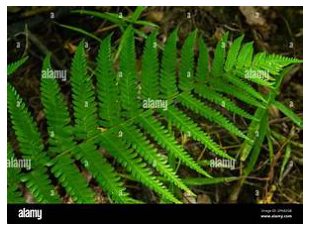

In [31]:
# Example usage
custom_image_path = "C:/Users/sharm/Downloads/Cat_test/class_4/n13.jpg"
testing_img = mpimg.imread(custom_image_path)
plt.imshow(testing_img)
plt.axis('off')
plt.show()


In [32]:
prediction = predict_image(custom_image_path)
print(f"Prediction: {prediction}")

Prediction: class_2


### Further Updated Code

In [33]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision import datasets
import matplotlib.pyplot as plt
from PIL import Image

# Import for precision, recall, and F1 score
from sklearn.metrics import precision_score, recall_score, f1_score

# Pretrained SwinTransformer import
import timm

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [34]:
# Define the SwinTransformer model
class SwinTransformer(nn.Module):
    def __init__(self, num_classes=4):
        super(SwinTransformer, self).__init__()
        # Use pre-trained SwinTransformer from timm
        self.model = timm.create_model('swin_tiny_patch4_window7_224', pretrained=True, num_classes=num_classes)

    def forward(self, x):
        return self.model(x)



In [35]:
# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [36]:
# **New Data Augmentation & Normalization**
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),  # Increased random rotation for better augmentation
    transforms.RandomVerticalFlip(),  # **New**: Added random vertical flip
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),  # **New**: Random cropping to introduce more variability
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.3),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # **New**: Added normalization for the pretrained model
])


In [37]:
# Load data
train_data = datasets.ImageFolder('C:/Users/sharm/Downloads/Cat_train', transform=transform)
test_data = datasets.ImageFolder('C:/Users/sharm/Downloads/Cat_test', transform=transform)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)



In [38]:
# Initialize model, loss, and optimizer
model = SwinTransformer(num_classes=4).to(device)
criterion = nn.CrossEntropyLoss()



In [39]:
# **New Optimization and Learning Rate Scheduler**
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-4)  # **New**: AdamW optimizer with weight decay
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)  # **New**: Learning rate scheduler to reduce learning rate after 5 epochs



In [40]:
# **New Early Stopping Class**
class EarlyStopping:
    def __init__(self, patience=5, min_delta=0.001):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False

    def __call__(self, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
        elif val_loss > self.best_loss - self.min_delta:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.counter = 0

early_stopping = EarlyStopping(patience=5, min_delta=0.001)


In [41]:
# Training loop
def train(epochs):
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0  # **New**: Track running loss for better monitoring
        for i, (images, labels) in enumerate(train_loader):
            images, labels = images.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()  # **New**: Accumulate loss
            if (i + 1) % 10 == 0:  # **New**: Print loss every 10 batches
                print(f'Batch [{i+1}/{len(train_loader)}], Loss: {running_loss / 10:.4f}')
                running_loss = 0.0
        
        scheduler.step()  # **New**: Step the learning rate scheduler after each epoch
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

        # **New**: Early stopping to prevent overfitting
        val_loss = loss.item()
        early_stopping(val_loss)
        if early_stopping.early_stop:
            print("Early stopping triggered")
            break

In [42]:
# Test function
def test():
    model.eval()
    correct = 0
    total = 0
    all_preds = []  # **New**: Moved here for test evaluation improvements
    all_labels = []  # **New**: Moved here for test evaluation improvements
    
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
            all_preds.extend(predicted.cpu().numpy())  # **New**: Collect predictions
            all_labels.extend(labels.cpu().numpy())  # **New**: Collect true labels

    accuracy = 100 * correct / total
    print(f'Accuracy on test images: {accuracy}%')
    
    # **New**: Calculate precision, recall, and F1 score
    recall = recall_score(all_labels, all_preds, average='weighted')
    f1 = f1_score(all_labels, all_preds, average='weighted')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    
    return accuracy, recall, f1

In [43]:
# Train the model
train(epochs=15)  # **New**: Increased epochs to 15 for better training

Epoch [1/15], Loss: 1.3479
Epoch [2/15], Loss: 0.7835
Epoch [3/15], Loss: 0.4533
Epoch [4/15], Loss: 0.2833
Epoch [5/15], Loss: 0.1611
Epoch [6/15], Loss: 0.2001
Epoch [7/15], Loss: 0.0862
Epoch [8/15], Loss: 0.0797
Epoch [9/15], Loss: 0.1454
Epoch [10/15], Loss: 0.0956
Epoch [11/15], Loss: 0.1009
Epoch [12/15], Loss: 0.1018
Epoch [13/15], Loss: 0.1591
Early stopping triggered


In [44]:
# Test the model
accuracy, recall, f1 = test()


Accuracy on test images: 61.53846153846154%
Recall: 0.6154
F1 Score: 0.6108


In [13]:
''' 

# **New**: Test Time Augmentation function (TTA)
def test_with_tta():
    model.eval()
    correct = 0
    total = 0
    tta_transforms = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            
            # Create augmented versions of the test image
            augmented_outputs = []
            for _ in range(5):  # **New**: Perform 5 augmentations for TTA
                tta_images = torch.stack([tta_transforms(img) for img in images]).to(device)
                outputs = model(tta_images)
                augmented_outputs.append(outputs)
            
            # **New**: Average the model predictions over the augmented images
            outputs_avg = torch.mean(torch.stack(augmented_outputs), dim=0)
            _, predicted = torch.max(outputs_avg.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Accuracy with TTA: {accuracy}%')
    return accuracy
'''

In [45]:
# Function to predict on a single image
def predict_image(image_path):
    image = Image.open(image_path)
    image = transform(image).unsqueeze(0).to(device)
    
    model.eval()
    with torch.no_grad():
        output = model(image)
        _, predicted = torch.max(output, 1)
    
    return train_data.classes[predicted.item()]


In [46]:
import os
import random

# Define the base test folder path
test_folder = "C:/Users/sharm/Downloads/Cat_test"

# List the available class folders
class_folders = ["class_1", "class_2", "class_3", "class_4"]

# Randomly select a folder
selected_folder = random.choice(class_folders)

# Construct the full path to the selected folder
selected_folder_path = os.path.join(test_folder, selected_folder)

# Get the list of image files in the selected folder
image_files = [f for f in os.listdir(selected_folder_path) if os.path.isfile(os.path.join(selected_folder_path, f))]

# Randomly select an image from the selected folder
selected_image = random.choice(image_files)

# Construct the full path to the selected image
custom_image_path = os.path.join(selected_folder_path, selected_image)

# Print the path of the selected image
print(f"Selected image path: {custom_image_path}")


Selected image path: C:/Users/sharm/Downloads/Cat_test\class_1\cat2.jpg


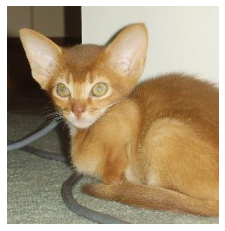

In [47]:
# Example usage
#custom_image_path = "C:/Users/sharm/Downloads/Cat_test/class_2/sample.jpg"
testing_img = mpimg.imread(custom_image_path)
plt.imshow(testing_img)
plt.axis('off')
plt.show()

In [48]:
prediction = predict_image(custom_image_path)
print(f"Prediction: {prediction}")

Prediction: class_1


### Summary of the Accuracy Display
First Accuracy: The accuracy from the test() function shows how well the model performs in its standard evaluation setup.

Second Accuracy: The accuracy from the test_with_tta() function demonstrates how well the model performs when additional augmentations are applied during testing, which typically leads to improved results. But it needs to be in ndarray or pil format for the function call to work.